<a href="https://colab.research.google.com/github/KTH-EXPECA/summer-school-2025/blob/main/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5G Packet Delay Modeling, Part 2: Conditional Density Estimation with Mixture Density Networks

## Quick navigation
- **Step 1: Setup — Install & Load Data**  
- **Step 2: Conditional Latency/Reliability Analysis**
- **Step 3: Train Conditional Models**

### Step 1: Install and Load Data

In this section, we will:  
1. **Install dependencies**  
2. **Download the dataset**  
3. **Import required Python packages**
4. **Load datasets**

In [1]:
# Install dependencies
!pip install scipy
!pip install git+https://github.com/samiemostafavi/pr3d.git@develop

  Cloning https://github.com/samiemostafavi/pr3d.git (to revision develop) to /tmp/pip-req-build-qo10yfq5
  Running command git clone --filter=blob:none --quiet https://github.com/samiemostafavi/pr3d.git /tmp/pip-req-build-qo10yfq5
  Running command git checkout -b develop --track origin/develop
  Switched to a new branch 'develop'
  Branch 'develop' set up to track remote branch 'develop' from 'origin'.
  Resolved https://github.com/samiemostafavi/pr3d.git to commit 2c5806818347ea7e18e96deefb4f23650aa9d7f9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pr3d: filename=pr3d-0.0.1-py3-none-any.whl size=39833 sha256=0dae9bc642a9f35f5b9f65daeb7bbcd04adbe1620306bea8e4d1a86c4ab84418
  Stored in directory: /tmp/pip-ephem-wheel-cache-zso8b0vv/wheels/2e/f1/46/c7fb0202d4cdd4342fc69e7b73610f10b6555fc96784bfcdb1
Successfully built pr3d


In [14]:
# Download datasets from Github
!mkdir -p /content/data
!curl -L -o /content/data/dataset.zip "https://github.com/KTH-EXPECA/summer-school-2025/raw/refs/heads/main/dataset.zip"
!unzip -q -o /content/data/dataset.zip
!rm -rf /content/data
!rm -rf /content/__MACOSX

!curl -sSLo helpers.py https://raw.githubusercontent.com/KTH-EXPECA/summer-school-2025/main/helpers.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 20.5M  100 20.5M    0     0  12.7M      0  0:00:01  0:00:01 --:--:-- 20.3M


In [15]:
# Import required packages
import pickle, json
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Import helper
import importlib
import helpers  # import as a module
importlib.reload(helpers);  # ensure fresh import in case you re-download
from helpers import *

In [3]:
# Load datasets

pkl_path = Path("/content/dataset.pkl")
with open(pkl_path, "rb") as f:
    datasets = pickle.load(f)

packets_df_list = []
for i, item in enumerate(datasets, 1):
    df = pd.DataFrame(item.get("dataset"))
    meta = {k: v for k, v in item.items() if k not in ["dataset", "db_id"]}

    # filter
    packets_df = df[df["segment"] == -1].copy()
    packets_df['packet_delay_ms'] = (
        packets_df['depart_timestamp'].astype(float) - packets_df['timestamp'].astype(float)
    ) * 1000

    # compute stats
    stats = {
        "Mean Packet Length": np.mean(packets_df["len"]),
        "Mean MCS Index": np.mean(packets_df["mcs_index"]),
        "Std MCS Index": np.std(packets_df["mcs_index"]),
        "Mean HARQ Retx.": np.mean(packets_df["mretx"]),
        "Mean RLC Retx.": np.mean(packets_df["rfailed"]),
        "Mean Latency": np.mean(packets_df["packet_delay_ms"]),
    }

    # pretty print
    print(f"\n{'='*25} DATASET {i} {'='*25}")
    print("Meta information:")
    display(pd.DataFrame([meta]))   # nicely formatted as a table
    print("\nStatistics:")
    display(pd.DataFrame([stats]))
    print(f"\nDataFrame shape: {df.shape}, columns: {list(df.columns)}")

    packets_df_list.append(packets_df)


# combine all into one DataFrame
packets_df_all = pd.concat(packets_df_list, ignore_index=True)
print(f"\n\nCombined DataFrame shape: {packets_df_all.shape}, columns: {list(packets_df_all.columns)}")


========================= DATASET 1 =========================
Meta information:


,dataset_name,stream_rnti,size,arrivals_num
0,e20,77e2,90306,18061



Statistics:


,Mean Packet Length,Mean MCS Index,Std MCS Index,Mean HARQ Retx.,Mean RLC Retx.,Mean Latency
0,127.940701,23.919274,1.643363,0.487625,1.13089,47.819503



DataFrame shape: (90306, 13), columns: ['segment', 'packet_id', 'timestamp', 'depart_timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event']

========================= DATASET 2 =========================
Meta information:


,dataset_name,stream_rnti,size,arrivals_num
0,e4,a431,146421,36602



Statistics:


,Mean Packet Length,Mean MCS Index,Std MCS Index,Mean HARQ Retx.,Mean RLC Retx.,Mean Latency
0,227.88946,20.0,0.0,0.000109,0.00112,18.853617



DataFrame shape: (146421, 13), columns: ['segment', 'packet_id', 'timestamp', 'depart_timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event']

========================= DATASET 3 =========================
Meta information:


,dataset_name,stream_rnti,size,arrivals_num
0,e19,37ff,89016,18058



Statistics:


,Mean Packet Length,Mean MCS Index,Std MCS Index,Mean HARQ Retx.,Mean RLC Retx.,Mean Latency
0,127.940691,22.675767,1.490224,0.568668,1.043803,43.780747



DataFrame shape: (89016, 13), columns: ['segment', 'packet_id', 'timestamp', 'depart_timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event']

========================= DATASET 4 =========================
Meta information:


,dataset_name,stream_rnti,size,arrivals_num
0,e6,71f5,146155,36532



Statistics:


,Mean Packet Length,Mean MCS Index,Std MCS Index,Mean HARQ Retx.,Mean RLC Retx.,Mean Latency
0,1027.38558,20.0,0.0,0.003668,0.00063,19.210568



DataFrame shape: (146155, 13), columns: ['segment', 'packet_id', 'timestamp', 'depart_timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event']

========================= DATASET 5 =========================
Meta information:


,dataset_name,stream_rnti,size,arrivals_num
0,e8,2779,256363,73053



Statistics:


,Mean Packet Length,Mean MCS Index,Std MCS Index,Mean HARQ Retx.,Mean RLC Retx.,Mean Latency
0,1023.674127,19.563276,0.590081,0.209095,0.001122,21.4974



DataFrame shape: (256363, 13), columns: ['segment', 'packet_id', 'depart_timestamp', 'timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event']

========================= DATASET 6 =========================
Meta information:


,dataset_name,stream_rnti,size,arrivals_num
0,e7,e595,252737,72214



Statistics:


,Mean Packet Length,Mean MCS Index,Std MCS Index,Mean HARQ Retx.,Mean RLC Retx.,Mean Latency
0,773.760019,20.0,0.0,0.082366,0.000291,20.585431



DataFrame shape: (252737, 13), columns: ['segment', 'packet_id', 'depart_timestamp', 'timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event']


Combined DataFrame shape: (254520, 14), columns: ['segment', 'packet_id', 'timestamp', 'depart_timestamp', 'slot', 'len', 'mcs_index', 'mretx', 'rfailed', 'num_rbs', 'num_symbols', 'time_since_start', 'time_since_last_event', 'packet_delay_ms']


### Step 2: Exploring *Conditional* Delay Distributions

We now have experiments **e4, e6, e7, e8, e19, e20** aggregated into a single DataFrame, `packets_df_all`.

Key feature columns:
- **`len`** – packet length (bytes)
- **`mcs_index`** – MCS index used for the transmission
- **`mretx`** – number of HARQ retransmissions that **occurred** for the packet
- **`rfailed`** – number of RLC retransmissions that **occurred** for the packet

Our goal is to investigate how the **packet delay distribution** changes under different **transmission conditions** (MCS, retransmissions, packet length, etc.).

Specifically, we will:
- Compute and visualize the **empirical CCDF** under selected conditions
- Plot the **log(CCDF)** (tail probability) to examine rare, high-delay events

---

Below is an example that filters by the **number of HARQ retransmissions** and plots the corresponding delay tail probabilities.

💡 **Task:**  
Repeat the analysis for **RLC retransmissions (`rfailed`)**, **MCS index (`mcs_index`)**, and **packet length (`len`)**.  
Comment on any **correlations** you observe (e.g., does higher retransmission count shift the tail upward?).


Number of packets with 0 HARQ retransmission: 224842
Number of packets with 1 HARQ retransmission: 24561
Number of packets with 2 HARQ retransmission: 2829
Number of packets with more than 2 HARQ retransmission: 2288


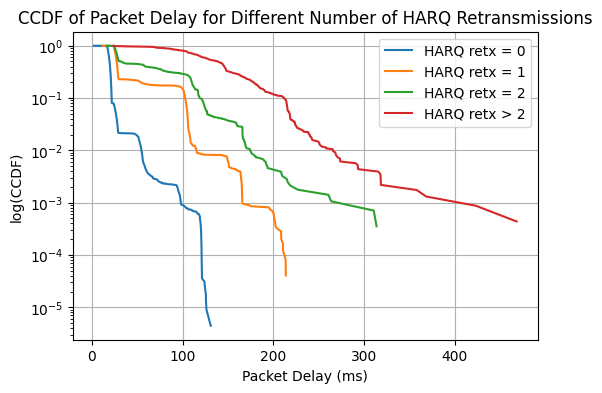

In [22]:
# Filter dataframes based on packet length
packets_mretx_eq0 = packets_df_all[(packets_df_all['mretx'] == 0)].copy()
print(f"Number of packets with 0 HARQ retransmission: {len(packets_mretx_eq0)}")

packets_mretx_eq1 = packets_df_all[(packets_df_all['mretx'] == 1)].copy()
print(f"Number of packets with 1 HARQ retransmission: {len(packets_mretx_eq1)}")

packets_mretx_eq2 = packets_df_all[(packets_df_all['mretx'] == 2)].copy()
print(f"Number of packets with 2 HARQ retransmission: {len(packets_mretx_eq2)}")

packets_mretx_geq3 = packets_df_all[(packets_df_all['mretx'] >= 3)].copy()
print(f"Number of packets with more than 2 HARQ retransmission: {len(packets_mretx_geq3)}")

# Function to compute and plot CCDF
def plot_ccdf(df, column, label):
    sorted_data = np.sort(df[column])
    ccdf = 1. - np.arange(len(sorted_data)) / float(len(sorted_data))
    plt.plot(sorted_data, ccdf, label=label)

# Plotting
plt.figure(figsize=(6, 4))
plot_ccdf(packets_mretx_eq0, 'packet_delay_ms', 'HARQ retx = 0')
plot_ccdf(packets_mretx_eq1, 'packet_delay_ms', 'HARQ retx = 1')
plot_ccdf(packets_mretx_eq2, 'packet_delay_ms', 'HARQ retx = 2')
plot_ccdf(packets_mretx_geq3, 'packet_delay_ms', 'HARQ retx > 2')

plt.xlabel('Packet Delay (ms)')
plt.ylabel('log(CCDF)')
plt.yscale('log')  # Plotting log(CCDF)
plt.title('CCDF of Packet Delay for Different Number of HARQ Retransmissions')
plt.legend()
plt.grid(True)
plt.show()

## Step 3: Conditional Density Estimation with Mixture Density Networks (MDN)

**Goal.** Instead of modeling a single marginal delay distribution, we now learn the **conditional distribution**  
where conditions are packet/PHY features (e.g., `mretx`, `rfailed`, `mcs_index`, `len`).
We use a **Mixture Density Network (MDN)**: a small neural net outputs the parameters of a Gaussian Mixture (weights, means, scales), and we train it by **minimizing the mean negative log-likelihood (NLL)** of the observed delays.

**How we train.** We use the helper `train_mlp_gmm_model(...)` to fit a **Conditional Mixture Density Network (MDN)** that predicts a
Gaussian Mixture for delay given features (e.g., `mretx`, `rfailed`, `mcs_index`, `len`).

**How we evaluate.** For a chosen condition (e.g., `mretx = 0` or `len ∈ [700,800]`), we:
1. **Filter** rows that match the condition.
2. **Average** the model’s conditional density over those rows
3. Plot **empirical PDF/CCDF** vs the **model PDF/CCDF** on the same axes.

You can use the helper below for evaluation.
```
plot_ccdf_pdf_with_model(
  df=<your DataFrame>,
  model=<trained conditional model>,
  max_x=400,
  y_mean=..., y_std=...,
  condition={"mretx": 0} # example
)
```

---

### 🧪 Your Task: Probe the Model Under Different Conditions

1. **Choose conditions** over key features. For example:
   - HARQ retransmissions: `mretx ∈ {0,1,2,≥3}`
   - RLC retransmissions: `rfailed ∈ {0,1,≥2}`
   - MCS index bins: e.g., `[20,22]`, `[22,25]`
   - Packet length ranges: `[100,200]`, `[500,800]`, `[900,1100]`

2. **For each condition, evaluate accuracy** using **Visual overlap** of empirical vs model **PDF** and **log-CCDF** (tail).

3. **Report where accuracy drops** and **why** it might happen:
   - **Data scarcity** in some slices (few samples → noisy tails).

> Tip: Start with coarse bins (e.g., `mretx ∈ {0, ≥1}`), then refine where you see large errors. Use consistent axes limits (e.g., `max_x=400`) to compare plots across conditions.

In [5]:
# Train a single layer perceptron GMM model
model, y_mean, y_std, history = train_mlp_gmm_model(
    x_dim = ['mretx', 'rfailed'],
    num_centers = 8,
    hidden_sizes = (8,8),
    df = packets_df_all,
    num_samples = 200,
    batch_size = 32,
    num_epochs = 100,
    learning_rate = 0.001,
    standardize = True,
    val_fraction=0.2
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 1.2085 - val_loss: 1.0314
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0637 - val_loss: 0.9879
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2550 - val_loss: 0.9464
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9993 - val_loss: 0.9093
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.1752 - val_loss: 0.8745
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9366 - val_loss: 0.8431
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8032 - val_loss: 0.8143
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8606 - val_loss: 0.7861
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7869 - val_loss: 0.7585
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9130 - val_loss: 0.7319
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7535 - val_loss: 0.7059
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7046 - val_lo

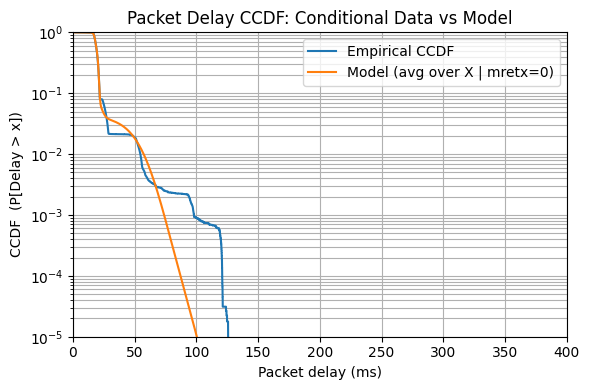

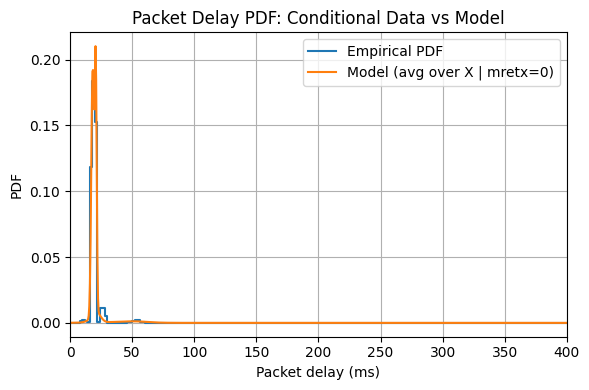

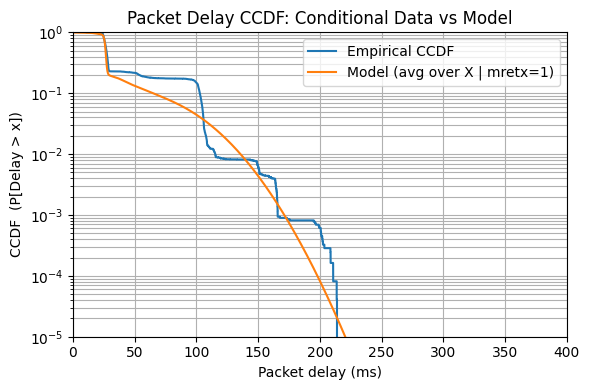

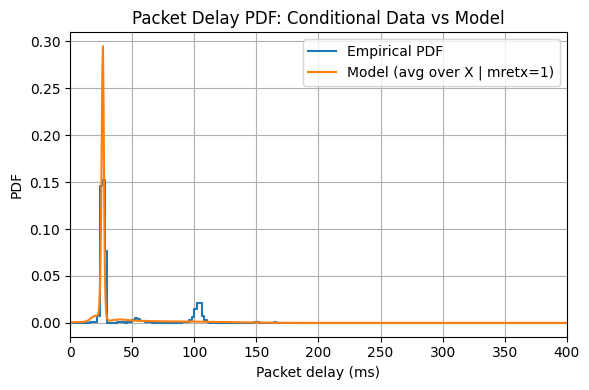

In [13]:
results = plot_ccdf_pdf_with_model(packets_df_all, model, 400, condition={'mretx':(0)}, y_mean=y_mean, y_std=y_std)
results = plot_ccdf_pdf_with_model(packets_df_all, model, 400, condition={'mretx':(1)}, y_mean=y_mean, y_std=y_std)